In [1]:
%matplotlib inline

import numpy as np
import pingouin as pg
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import shutil


# Nodal Network Metrics

In [2]:
GICA_300ROI =  ['Parietal Memory', 'Default Mode', 'Auditory', 'Cingulo Opercular', 'Dorsal Attention', 'Fronto Parietal',
                  'Medial Temporal Lobe', 'Parieto Medial', 'Reward', 'Salience', 'Somatomotor Dorsal', 'Somatomotor Lateral',
                  'Unassigned', 'Ventral Attention', 'Visual']

In [3]:
# AD
G1_BetweennessCentrality = [[f'/home/kevrodz/Documents/Master/functional_connectivity/GRAPH_RESULTS/GRAPH_RESULTS/AD/GICA_300ROI_correlacion/W{w}_ALL_AD/BetweennessCentrality/Bc_Thres{i:03}.txt' for w in range(11)] for i in range(1, 11, 1)]

# CN_AD
G2_BetweennessCentrality = [[f'/home/kevrodz/Documents/Master/functional_connectivity/GRAPH_RESULTS/GRAPH_RESULTS/CN_AD/GICA_300ROI_correlation/W{w}_ALL_CN_AD/BetweennessCentrality/Bc_Thres{i:03}.txt' for w in range(11)] for i in range(1, 11, 1)]

# MCI
G3_BetweennessCentrality = [[f'/home/kevrodz/Documents/Master/functional_connectivity/GRAPH_RESULTS/GRAPH_RESULTS/MCI/GICA_300ROI_correlacion/W{w}_MCI/BetweennessCentrality/Bc_Thres{i:03}.txt' for w in range(11)] for i in range(1, 11, 1)]

# CN_MCI
G4_BetweennessCentrality = [[f'/home/kevrodz/Documents/Master/functional_connectivity/GRAPH_RESULTS/GRAPH_RESULTS/CN_MCI/GICA_300ROI_CORRELACION/W{w}_CN_MCI/BetweennessCentrality/Bc_Thres{i:03}.txt' for w in range(11)] for i in range(1, 11, 1)]

# len is windows[thresholds]
print(G1_BetweennessCentrality)
print(G2_BetweennessCentrality)

[['/home/kevrodz/Documents/Master/functional_connectivity/GRAPH_RESULTS/GRAPH_RESULTS/AD/GICA_300ROI_correlacion/W0_ALL_AD/BetweennessCentrality/Bc_Thres001.txt', '/home/kevrodz/Documents/Master/functional_connectivity/GRAPH_RESULTS/GRAPH_RESULTS/AD/GICA_300ROI_correlacion/W1_ALL_AD/BetweennessCentrality/Bc_Thres001.txt', '/home/kevrodz/Documents/Master/functional_connectivity/GRAPH_RESULTS/GRAPH_RESULTS/AD/GICA_300ROI_correlacion/W2_ALL_AD/BetweennessCentrality/Bc_Thres001.txt', '/home/kevrodz/Documents/Master/functional_connectivity/GRAPH_RESULTS/GRAPH_RESULTS/AD/GICA_300ROI_correlacion/W3_ALL_AD/BetweennessCentrality/Bc_Thres001.txt', '/home/kevrodz/Documents/Master/functional_connectivity/GRAPH_RESULTS/GRAPH_RESULTS/AD/GICA_300ROI_correlacion/W4_ALL_AD/BetweennessCentrality/Bc_Thres001.txt', '/home/kevrodz/Documents/Master/functional_connectivity/GRAPH_RESULTS/GRAPH_RESULTS/AD/GICA_300ROI_correlacion/W5_ALL_AD/BetweennessCentrality/Bc_Thres001.txt', '/home/kevrodz/Documents/Master/

In [59]:
def df_threshold(g1, g2, g3, g4, g_names=[], roi_names=[], net_name='', name='', subname='', out='', save=True):
    if len(subname)>1:
        fname_all = f'{out}{name}/{net_name}/{subname}'
    else:
        fname_all = f'{out}{name}/{net_name}/'
    if save:
        if not os.path.exists(fname_all):
            os.makedirs(fname_all)
        else:
            shutil.rmtree(fname_all)  # Removes all the subdirectories
            os.makedirs(fname_all)
    group_roi = pd.DataFrame()
    mx_anova = pd.DataFrame()
    pw_test_1 = pd.DataFrame()
    pw_test_2 = pd.DataFrame()
    all_metrics = pd.DataFrame()
    for th, (g1_th, g2_th, g3_th, g4_th) in enumerate(zip(g1, g2, g3, g4), start=1):
        metrics = pd.DataFrame()
        idx = []
        for w, (g1_w, g2_w, g3_w, g4_w) in enumerate(zip(g1_th, g2_th, g3_th, g4_th)):
            #print('w:', w,'th:', th,'g1:', g1_w, 'g2:', g2_w, 'g3:', g3_w, 'g4:', g4_w)
            # column: node, row: subject
            g1_df = pd.read_fwf(g1_w, sep='\t', header=None)
            g1_df.columns = roi_names
            g1_df['group'] = g_names[0]
            g1_df['window'] = w
            g1_df['threshold'] = f'Thres{th:03}'
            g2_df = pd.read_fwf(g2_w, sep='\t', header=None)
            g2_df.columns = roi_names
            g2_df['group'] = g_names[1]
            g2_df['window'] = w
            g2_df['threshold'] = f'Thres{th:03}'
            g3_df = pd.read_fwf(g3_w, sep='\t', header=None)
            g3_df.columns = roi_names
            g3_df['group'] = g_names[2]
            g3_df['window'] = w
            g3_df['threshold'] = f'Thres{th:03}'
            g4_df = pd.read_fwf(g4_w, sep='\t', header=None)
            g4_df.columns = roi_names
            g4_df['group'] = g_names[3]
            g4_df['window'] = w
            g4_df['threshold'] = f'Thres{th:03}'
            metrics = pd.concat([metrics, g1_df, g2_df, g3_df, g4_df])
            if w==0:
                idx = list(metrics.index)
        print('idx:', len(idx))
        idx = list(range(len(idx)))*(w+1)
        #print(idx)
        #print(len(idx), w)
        metrics['Subject'] = idx
        metrics['threshold'] = f'Thres{th:03}'
        for idx_roi, roi in enumerate(roi_names):
            anovas = pd.DataFrame()
            anova = pg.mixed_anova(data=metrics[metrics['threshold']==f'Thres{th:03}'], dv=roi, between='group', within='window', subject='Subject', effsize='np2')
            anovas['Source'] = anova['Source'] if 'Source' in anova.columns else np.NaN
            anovas['SS'] = anova['SS'] if 'SS' in anova.columns else np.NaN
            anovas['DF1'] = anova['DF1'] if 'DF1' in anova.columns else np.NaN
            anovas['DF2'] = anova['DF2'] if 'DF2' in anova.columns else np.NaN
            anovas['MS'] = anova['MS'] if 'MS' in anova.columns else np.NaN
            anovas['F'] = anova['F'] if 'F' in anova.columns else np.NaN
            anovas['p-unc'] = anova['p-unc'] if 'p-unc' in anova.columns else np.NaN
            anovas['np2'] = anova['np2'] if 'np2' in anova.columns else np.NaN
            anovas['eps'] = anova['eps'] if 'eps' in anova.columns else np.NaN
            anovas['p-GG-corr'] = anova['p-GG-corr'] if 'p-GG-corr' in anova.columns else np.NaN
            anovas['sphericity'] = anova['sphericity'] if 'sphericity' in anova.columns else np.NaN
            anovas['W-spher'] = anova['W-spher'] if 'W-spher' in anova.columns else np.NaN
            anovas['p-spher'] = anova['p-spher'] if 'p-spher' in anova.columns else np.NaN
            anovas['threshold'] = f'Thres{th:03}'
            anovas['roi'] = roi
            anovas['metric_name'] = name
            mx_anova = pd.concat([mx_anova, anovas])
            #print(mx_anova)
            #print('pairwise_tests window')
            pw_t = pg.pairwise_tests(data=metrics[metrics['threshold']==f'Thres{th:03}'], dv=roi, between='group', within='window', subject='Subject', return_desc=True, padjust='bonf', effsize='cohen')
            pw_t['threshold'] = f'Thres{th:03}'
            pw_t['roi'] = roi
            pw_t['metric_name'] = name
            pw_test_1 = pd.concat([pw_test_1, pw_t])
            #print(pw_test_1)
            #print('pairwise_tests group')
            pw_t = pg.pairwise_tests(data=metrics[metrics['threshold']==f'Thres{th:03}'], dv=roi, between='group', within='window', subject='Subject', padjust='bonf', effsize='cohen', return_desc=True, within_first=False)
            pw_t['threshold'] = f'Thres{th:03}'
            pw_t['roi'] = roi
            pw_t['metric_name'] = name
            pw_test_2 = pd.concat([pw_test_2, pw_t])
            #print(pw_test_2)
        print(f'Th: {th}')

        group_results = pw_test_2[(pw_test_2['p-corr']<=0.05)]
        keep_tuples = [('AD', 'CN_AD'), ('AD', 'MCI'), ('CN_MCI', 'MCI'), ('CN_AD', 'CN_MCI')]
        tuples_in_group_results = pd.MultiIndex.from_frame(group_results[['A', 'B']])
        group_results = group_results[tuples_in_group_results.isin(keep_tuples)]
        group_results = group_results[['A', 'B', 'p-unc', 'p-corr', 'BF10', 'cohen', 'threshold', 'roi']]
        print(group_results)
        #group_results.to_csv(f'{fname_all}Thres{th:03}_group_results.csv')
        group_rois = list(set(group_results[(group_results['threshold'] == f'Thres{th:03}')]['roi'].tolist()))
        group_roi = pd.concat([group_roi, group_results])
        print(group_rois)
        for idx_net, net in enumerate(group_rois):
            sns.set_theme(style='whitegrid')
            #sns.set(rc={'figure.figsize':(11.7,8.27)})
            cat = sns.catplot(x='window', y=net, hue='group', data=metrics, errorbar='se', kind='bar', height=8.27, aspect=11.7/8.27, palette=sns.color_palette(['#CEC3C1', '#FC7753', '#66D7D1', '#403D58']))
            cat.set(ylim=(0, None))
            cat.set_ylabels(name)
            cat.set_xlabels('Windows')
            cat.set(title=net)
            plt.savefig(f'{fname_all}/Thres{th:03}_{name}_{net}.png', dpi=600)
        #print(metrics[metrics['window']==1])
        all_metrics = pd.concat([all_metrics, metrics])

    if save:
        mx_anova.to_csv(f'{fname_all}/{name}_mxanova.csv')
        pw_test_1.to_csv(f'{fname_all}/{name}_pairwisetest_window.csv')
        pw_test_2.to_csv(f'{fname_all}/{name}_pairwisetest_group.csv')
        group_results.to_csv(f'{fname_all}/{name}_group_results.csv')
        #all_metrics.to_csv(f'{fname_all}_metrics.csv')
    return all_metrics, mx_anova, pw_test_1, pw_test_2, group_results

In [60]:
fout = '/home/kevrodz/Documents/Master/functional_connectivity/dynamic/STATISTICS/GRAPHS/'

idx: 264
Th: 1
       A       B     p-unc    p-corr     BF10     cohen threshold  \
2     AD     MCI  0.005720  0.034322    6.581 -0.517817  Thres001   
3  CN_AD  CN_MCI  0.006850  0.041101     5.45  0.417079  Thres001   
0     AD   CN_AD  0.000923  0.005539   29.854 -0.529054  Thres001   
2     AD     MCI  0.000175  0.001051  152.506 -0.728442  Thres001   
2     AD     MCI  0.004725  0.028351    7.689  0.513194  Thres001   

                    roi  
2              Auditory  
3  Medial Temporal Lobe  
0              Salience  
2              Salience  
2            Unassigned  
['Auditory', 'Unassigned', 'Salience', 'Medial Temporal Lobe']
idx: 264
Th: 2
       A       B     p-unc    p-corr     BF10     cohen threshold  \
2     AD     MCI  0.005720  0.034322    6.581 -0.517817  Thres001   
3  CN_AD  CN_MCI  0.006850  0.041101     5.45  0.417079  Thres001   
0     AD   CN_AD  0.000923  0.005539   29.854 -0.529054  Thres001   
2     AD     MCI  0.000175  0.001051  152.506 -0.728442  Thr

/home/kevrodz/Documents/Master/neuro/lib/python3.10/site-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


idx: 264
Th: 5
       A       B         p-unc    p-corr       BF10     cohen threshold  \
2     AD     MCI  5.720403e-03  0.034322      6.581 -0.517817  Thres001   
3  CN_AD  CN_MCI  6.850165e-03  0.041101       5.45  0.417079  Thres001   
0     AD   CN_AD  9.231190e-04  0.005539     29.854 -0.529054  Thres001   
2     AD     MCI  1.752027e-04  0.001051    152.506 -0.728442  Thres001   
2     AD     MCI  4.725151e-03  0.028351      7.689  0.513194  Thres001   
3  CN_AD  CN_MCI  7.722089e-03  0.046333      5.091 -0.489766  Thres002   
2     AD     MCI  5.513556e-04  0.003308     49.167 -0.650176  Thres002   
3  CN_AD  CN_MCI  2.306220e-03  0.013837     14.405 -0.555925  Thres002   
2     AD     MCI  8.222292e-04  0.004933     35.827 -0.636559  Thres002   
3  CN_AD  CN_MCI  2.362845e-04  0.001418    105.409 -0.650459  Thres002   
2     AD     MCI  7.673688e-04  0.004604     36.236 -0.626698  Thres002   
2     AD     MCI  3.872701e-03  0.023236      9.219 -0.543969  Thres002   
3  CN_AD  

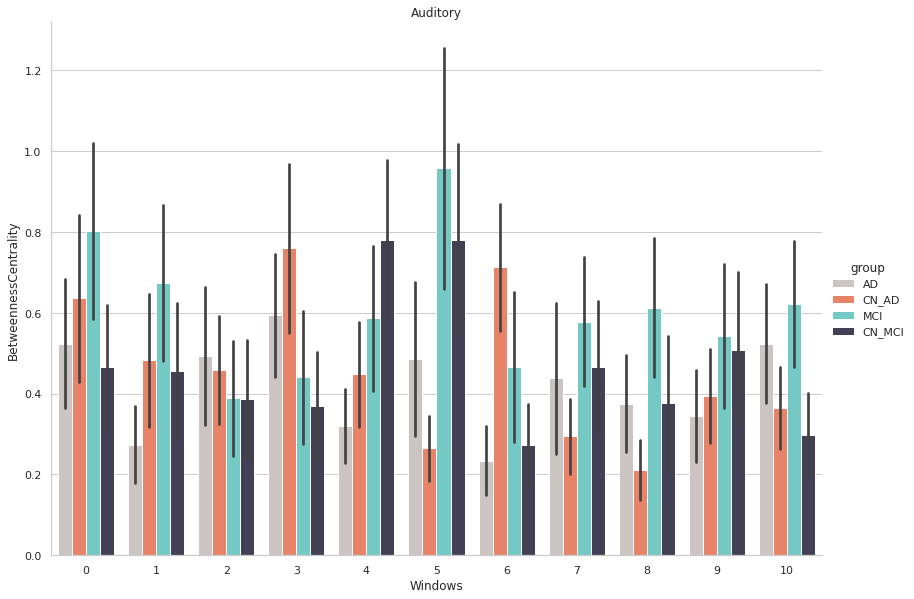

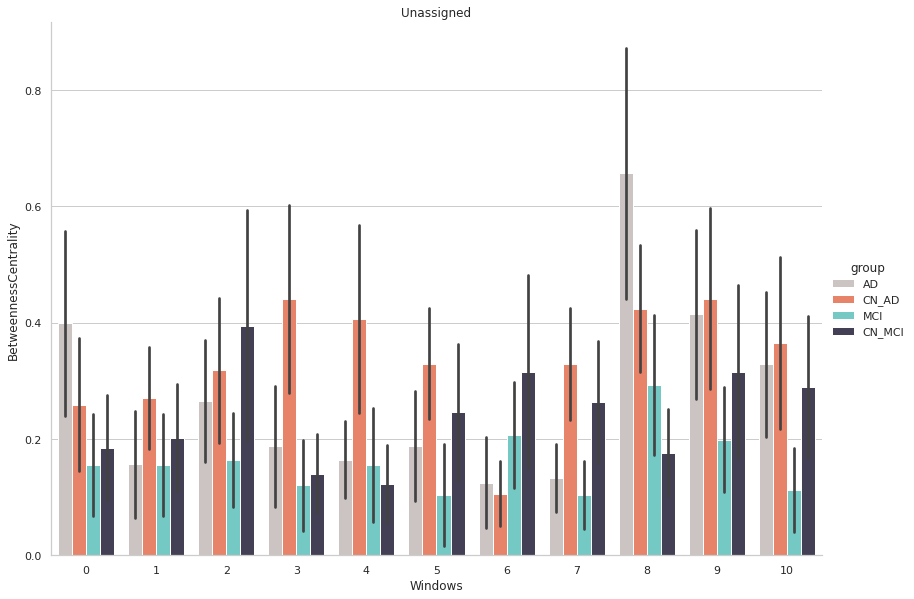

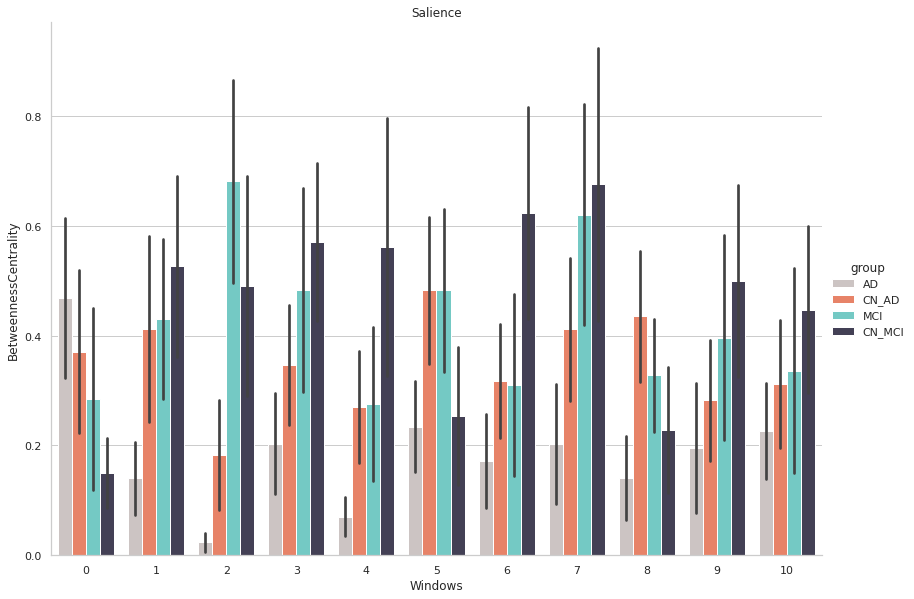

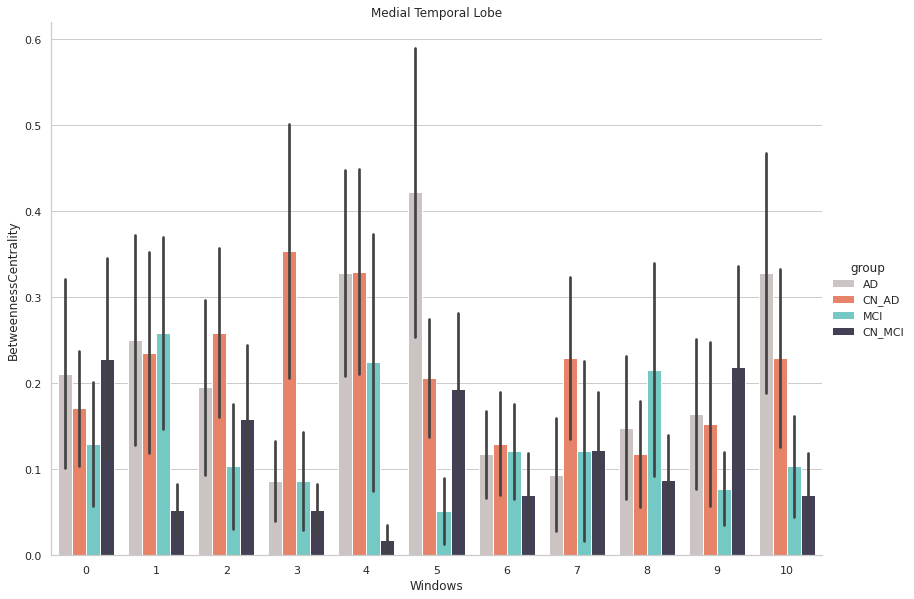

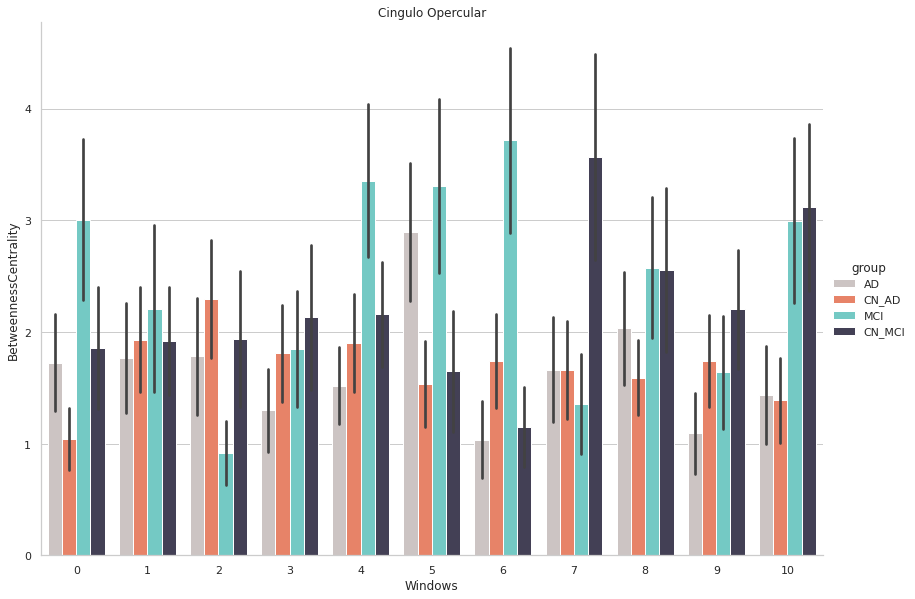

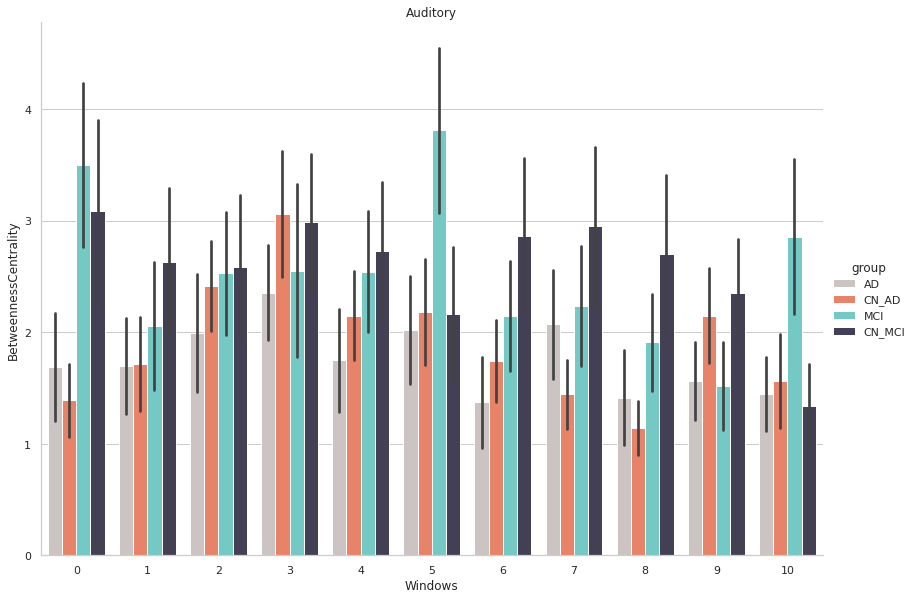

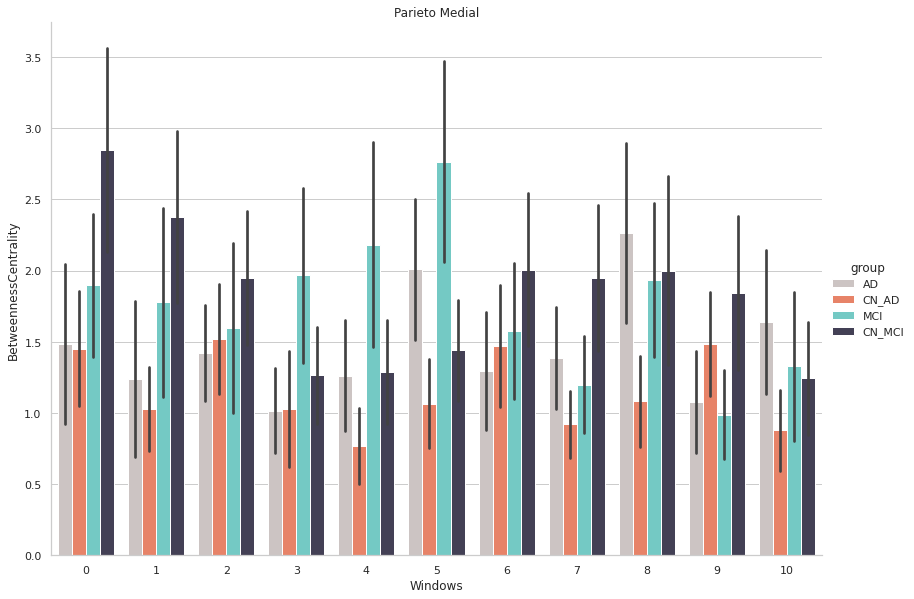

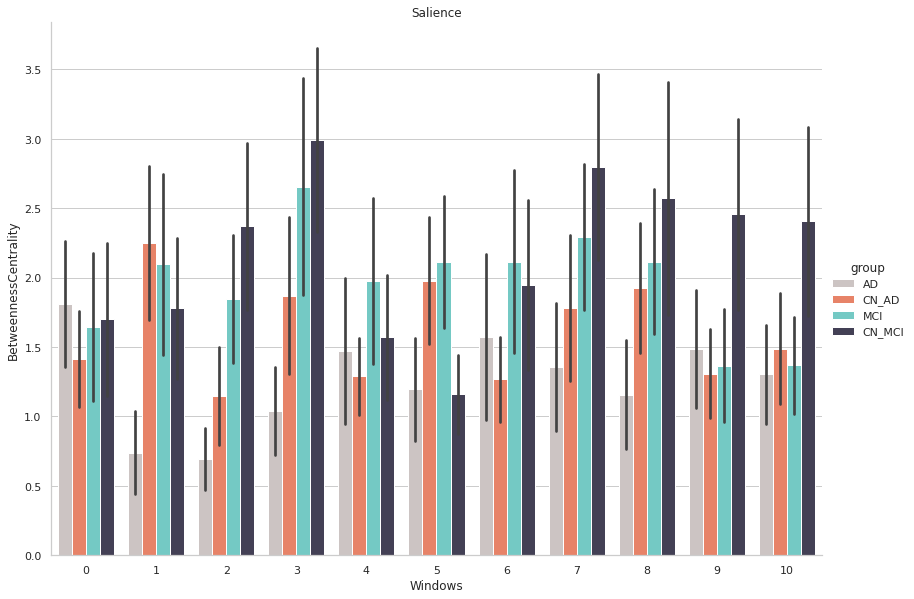

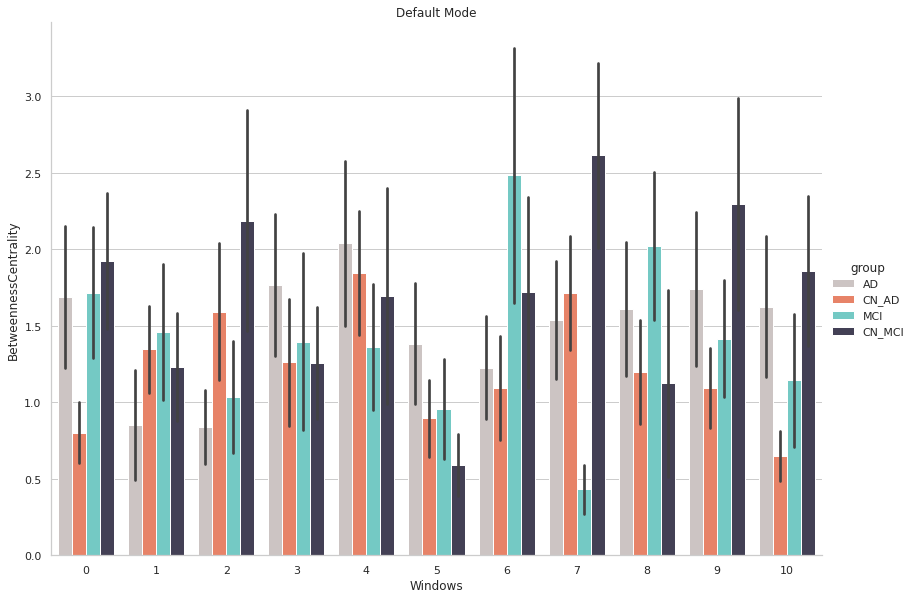

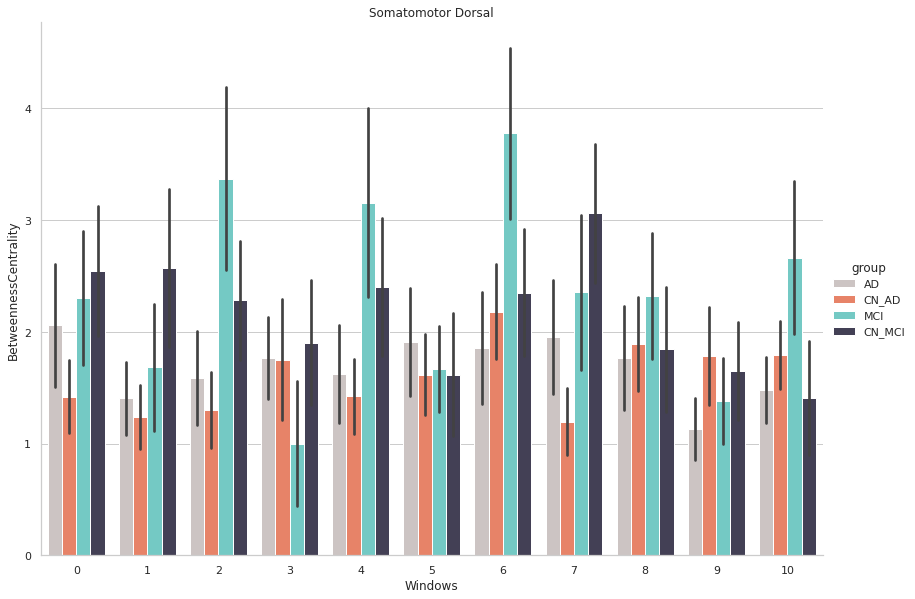

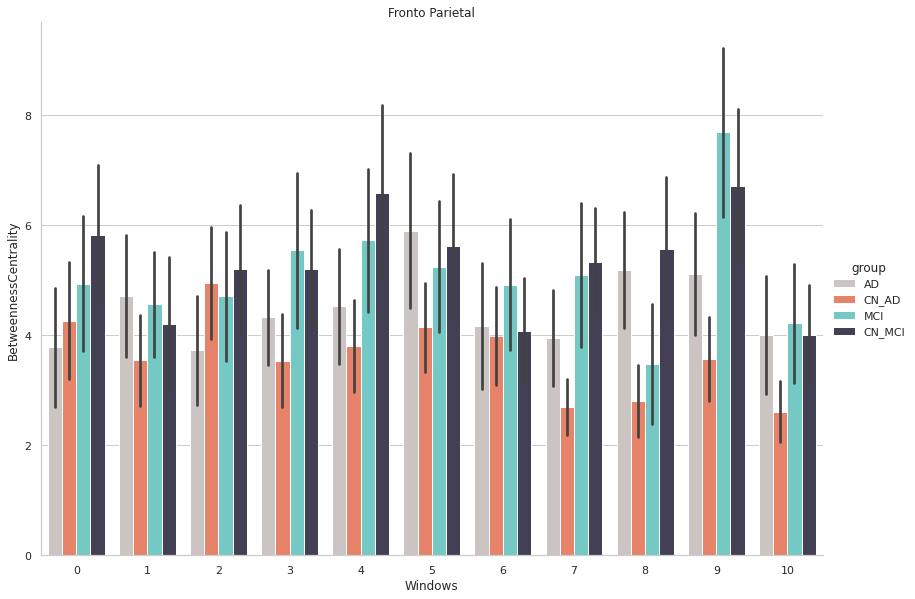

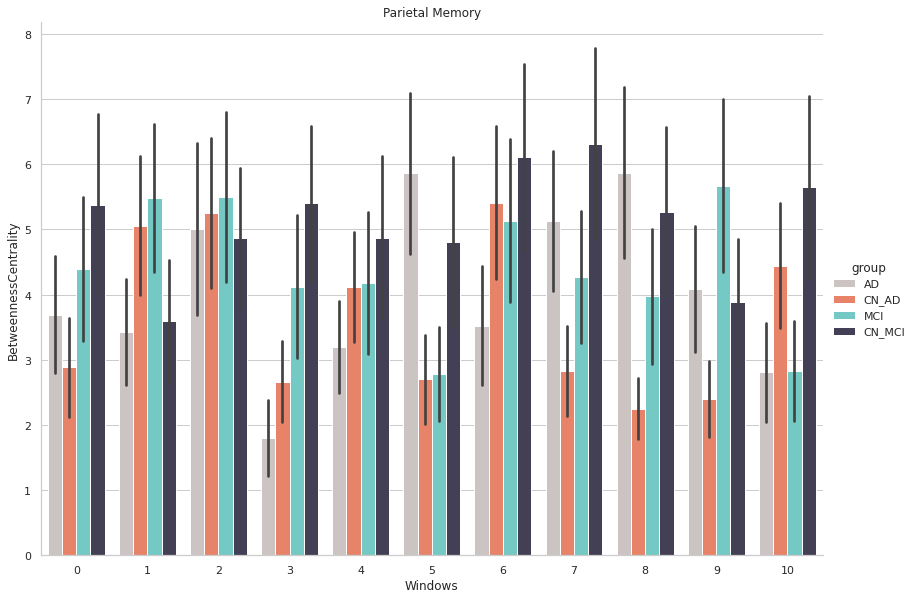

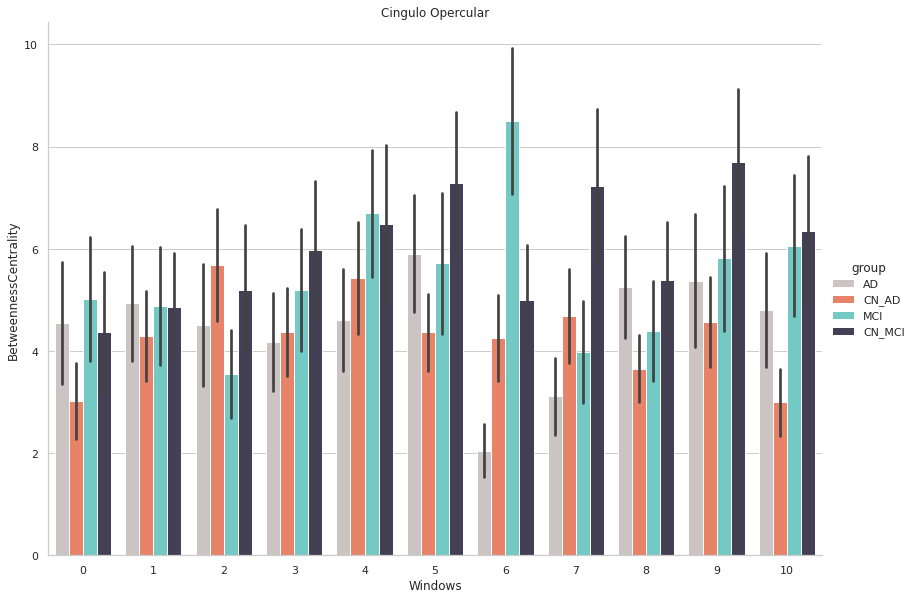

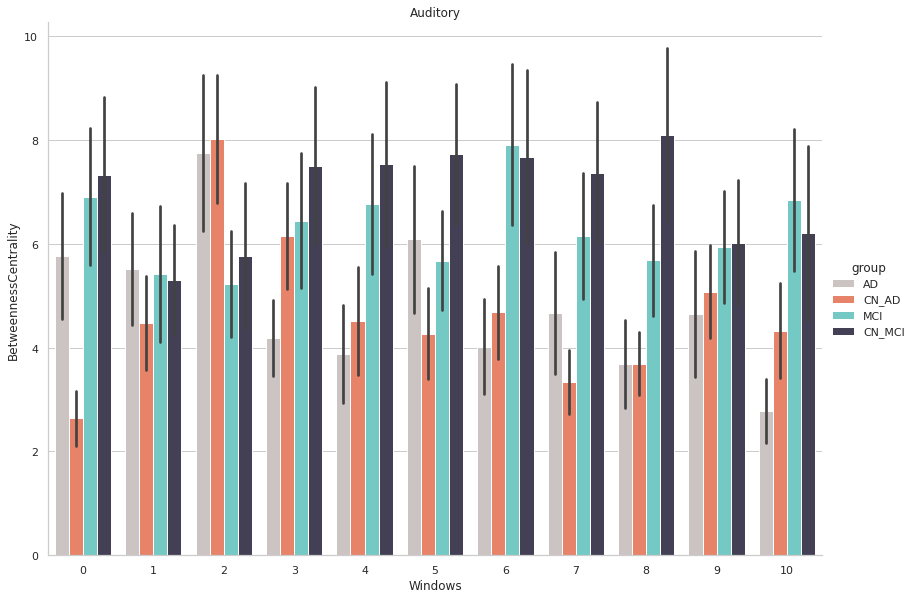

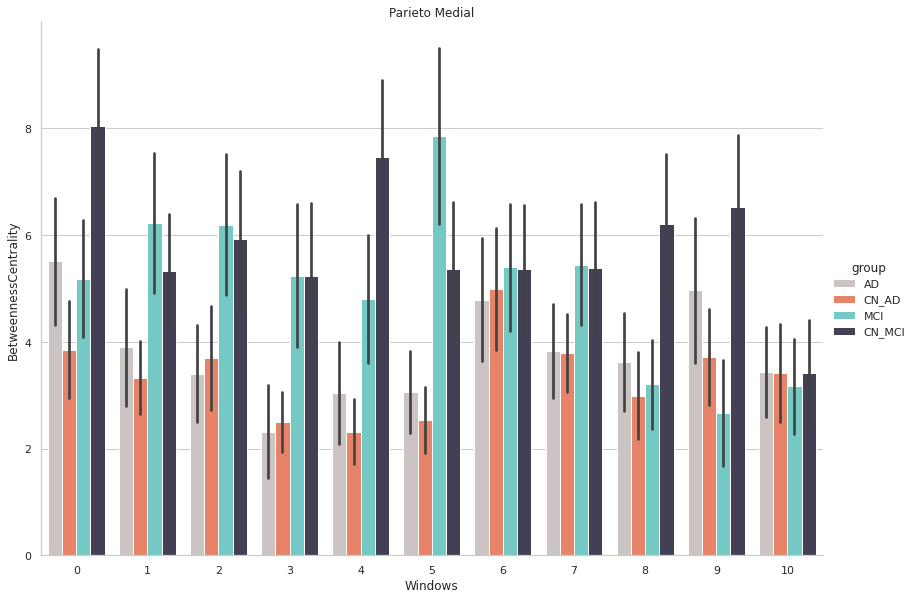

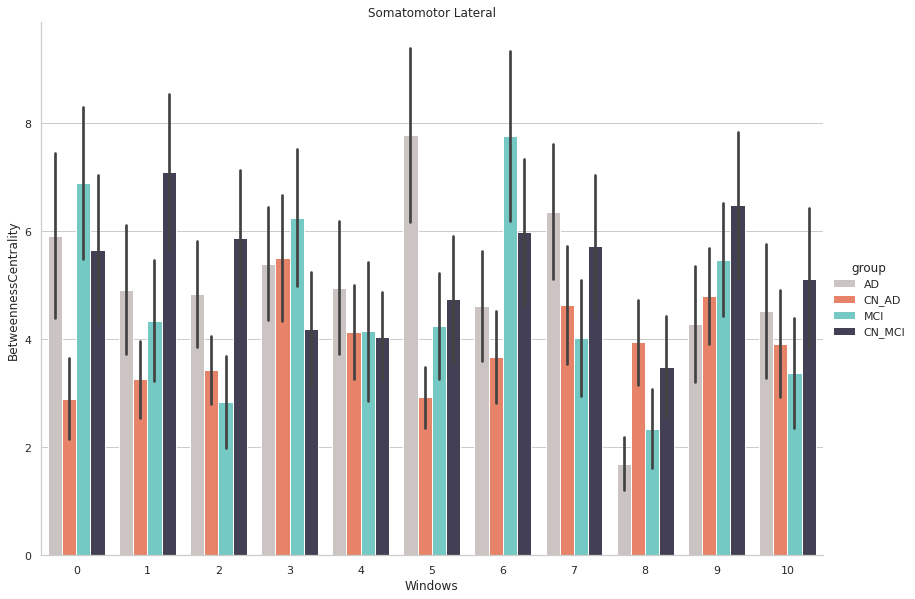

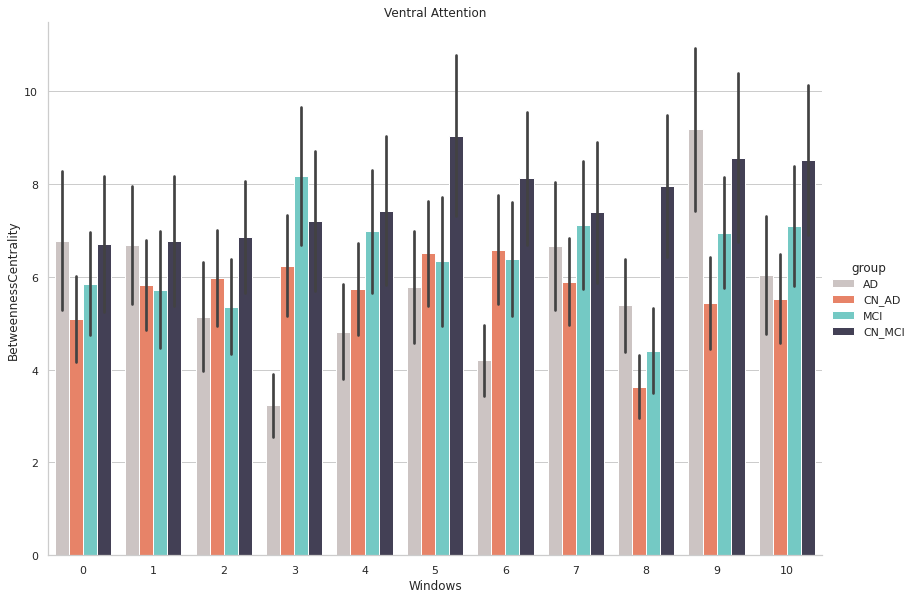

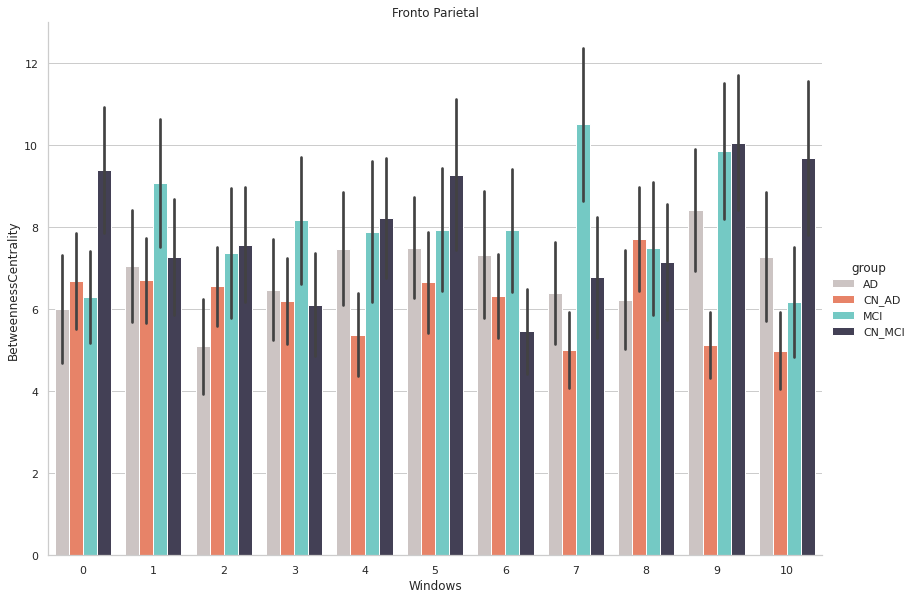

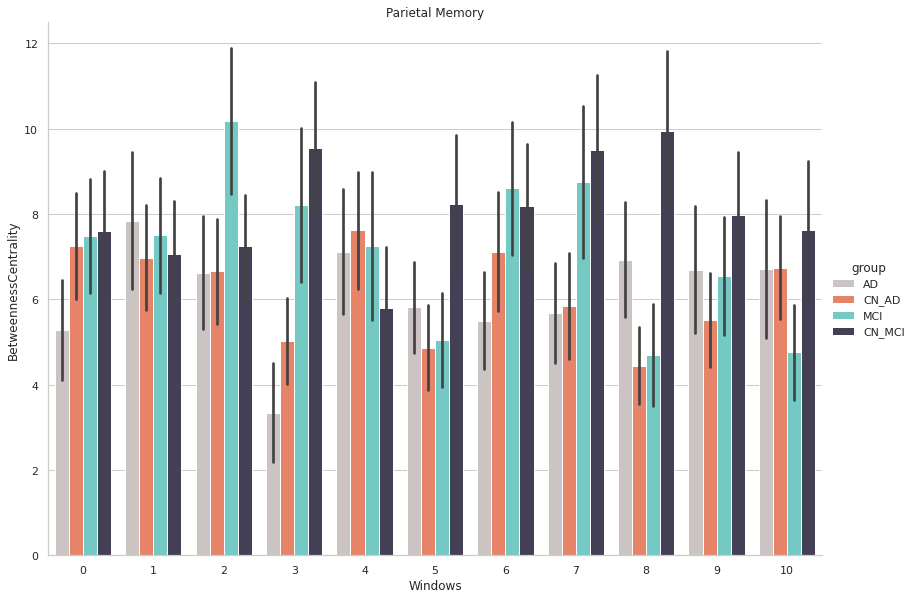

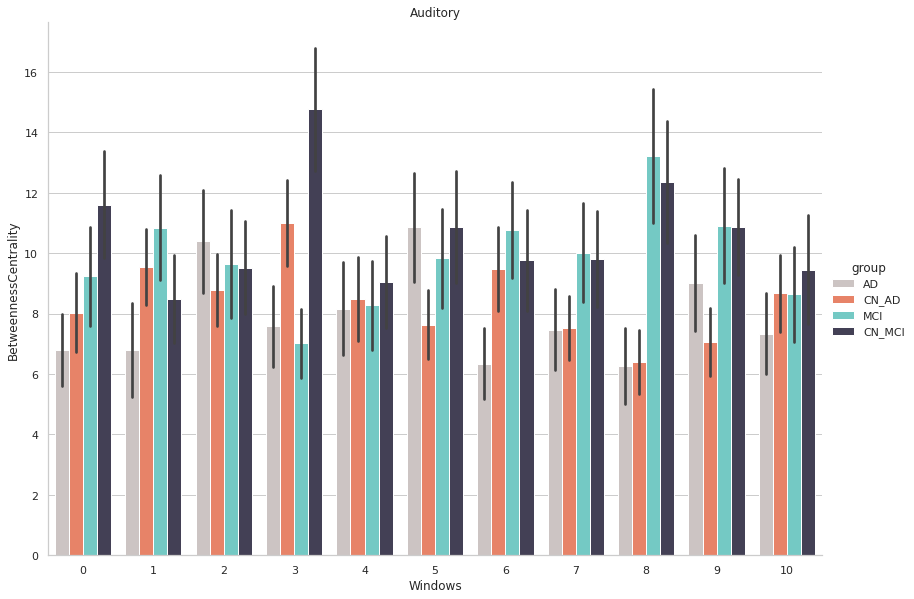

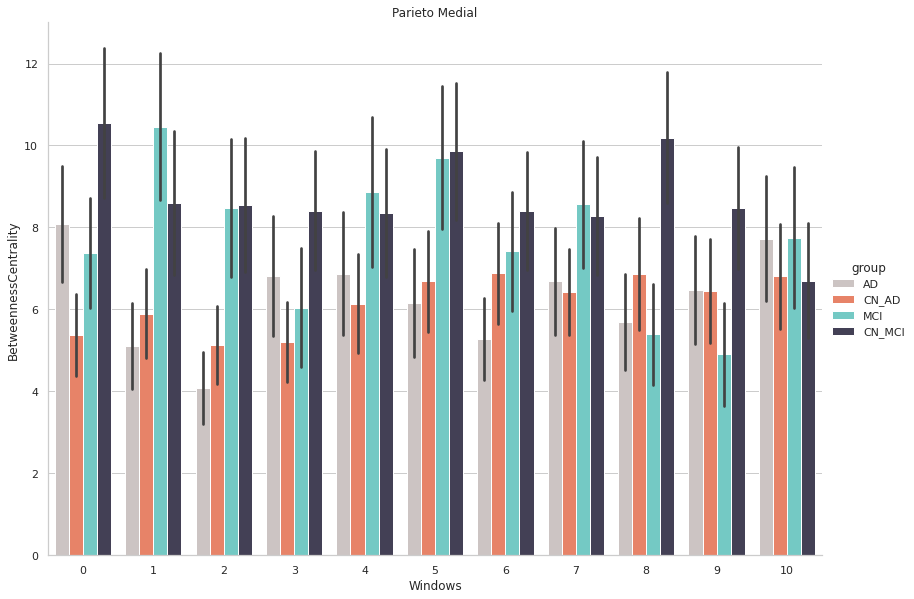

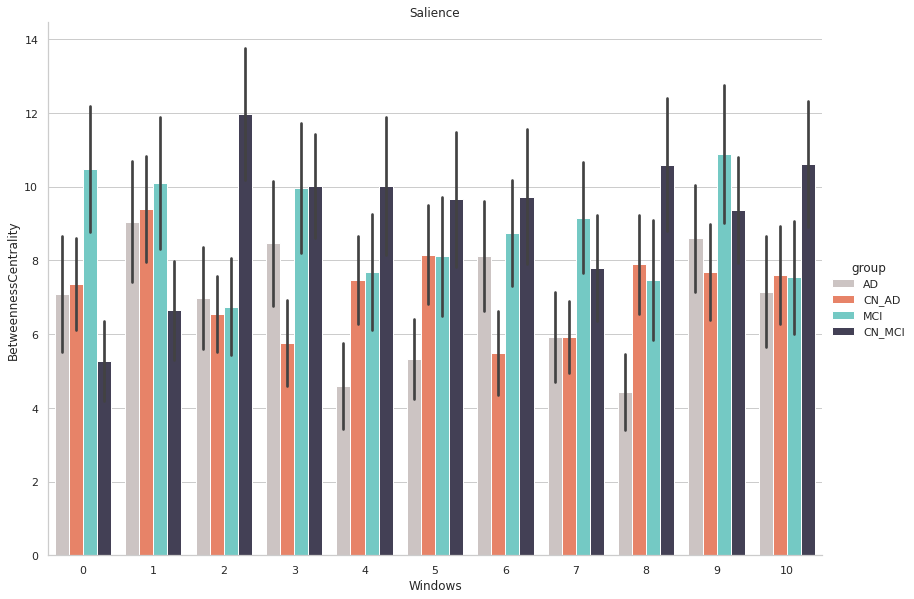

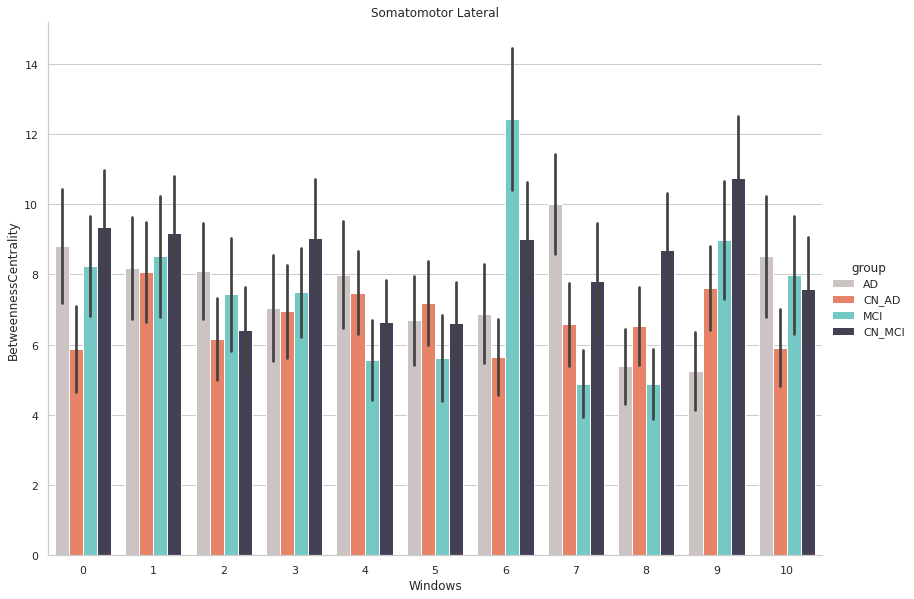

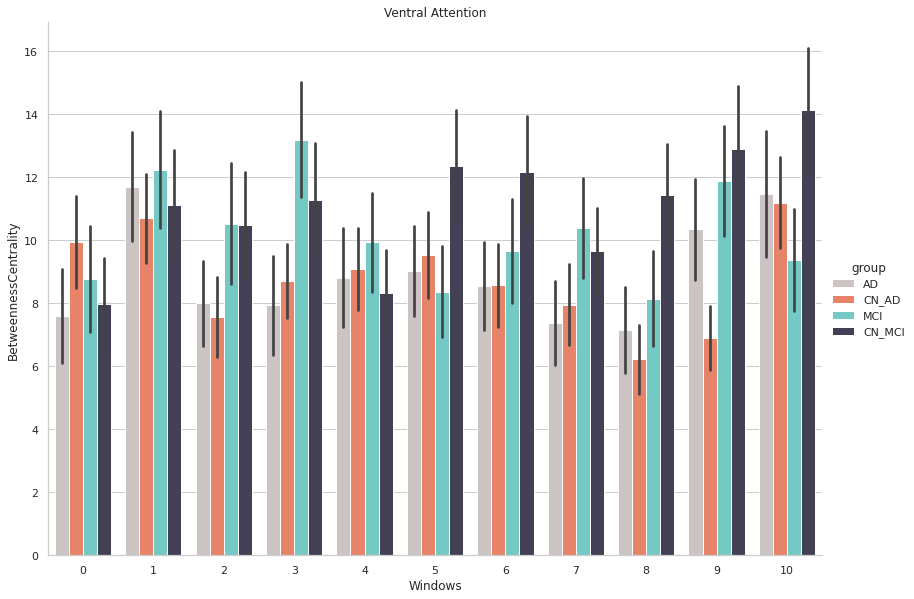

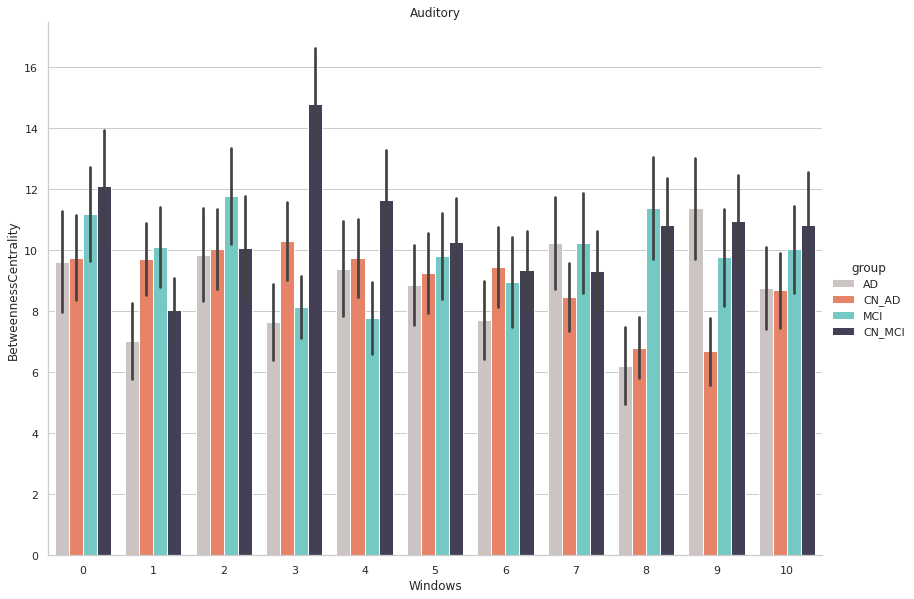

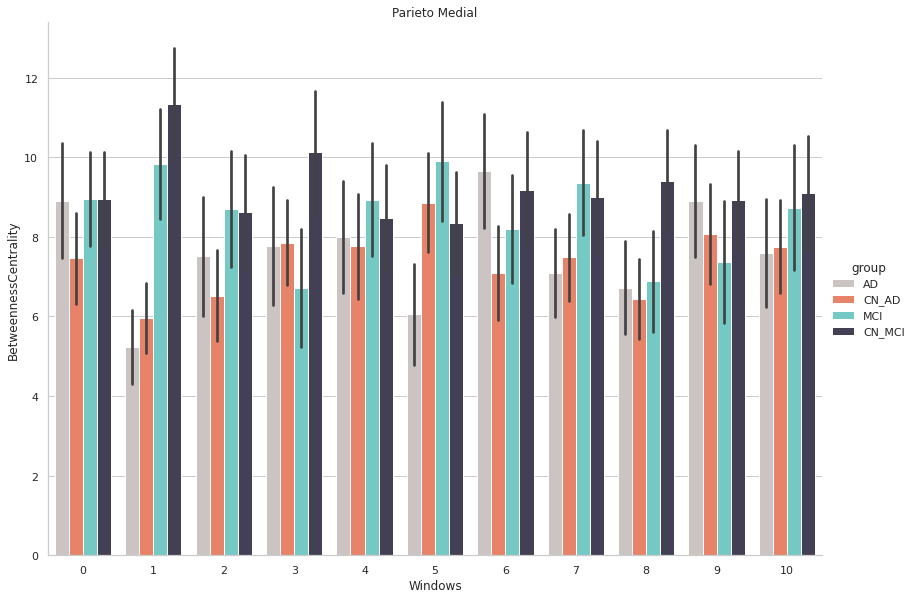

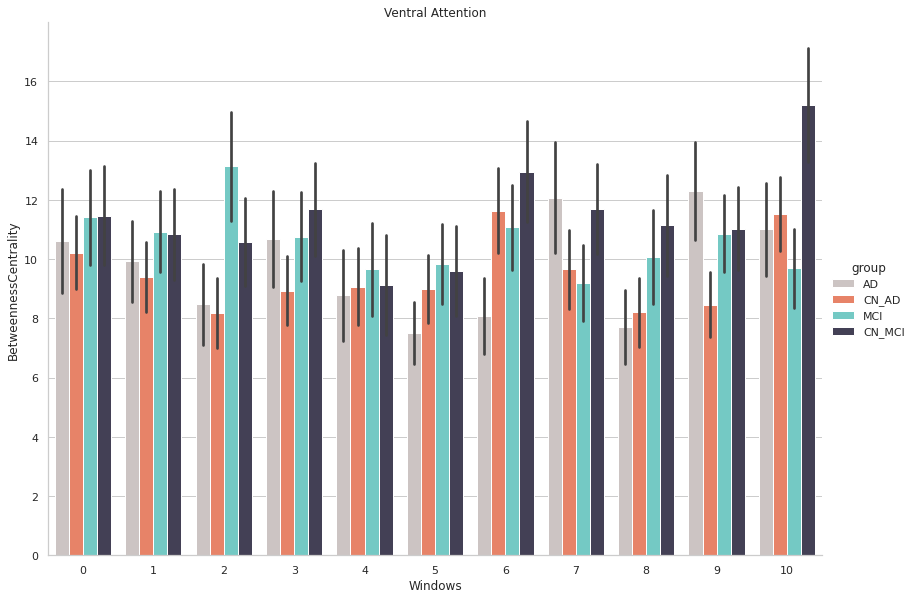

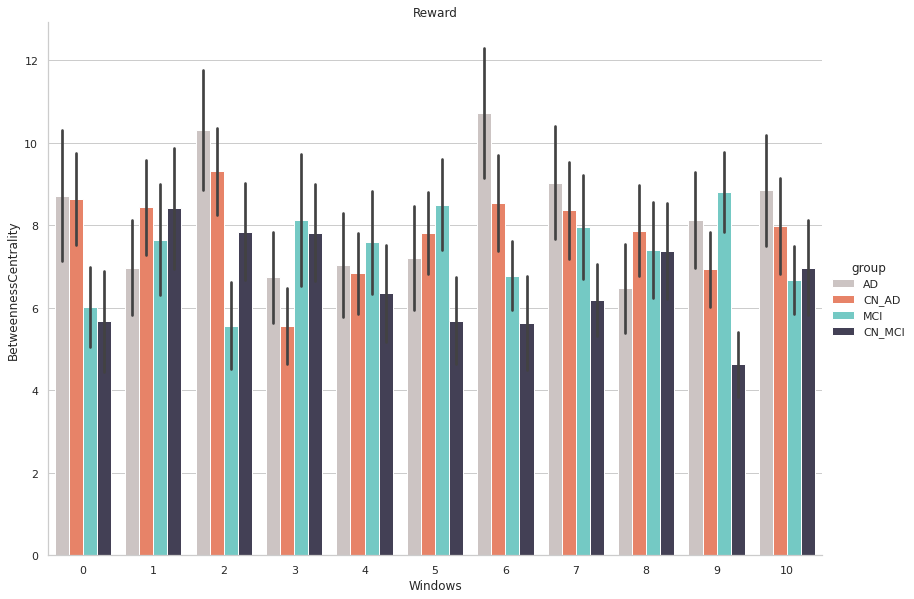

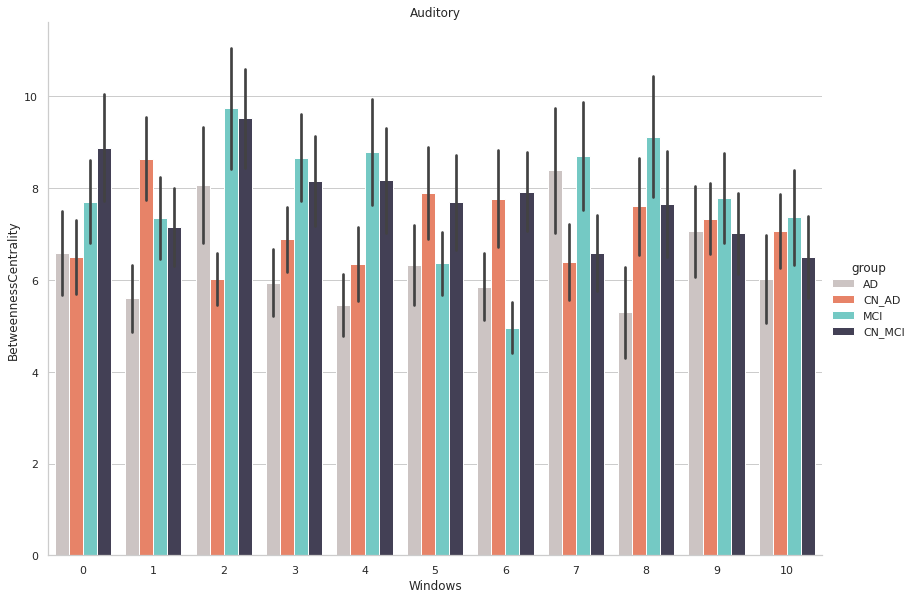

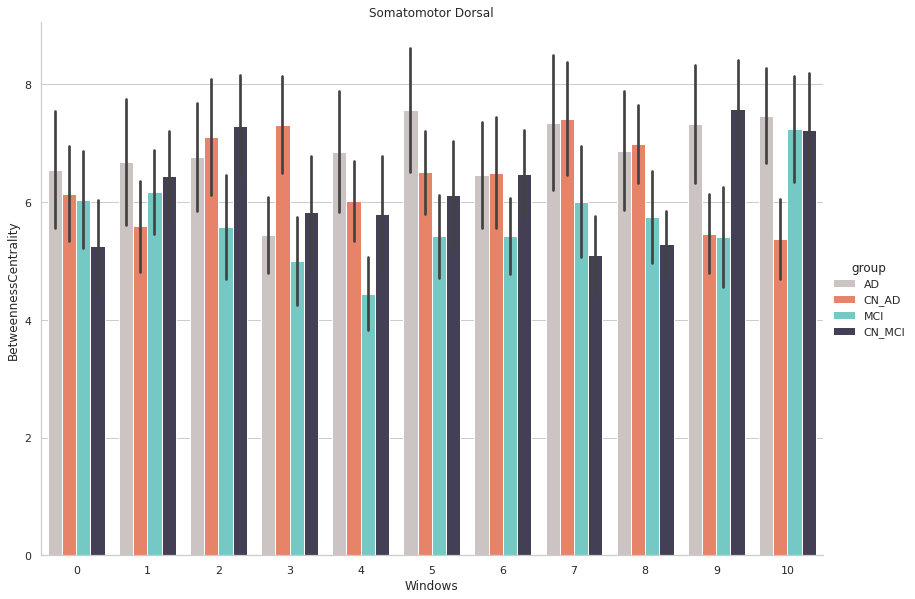

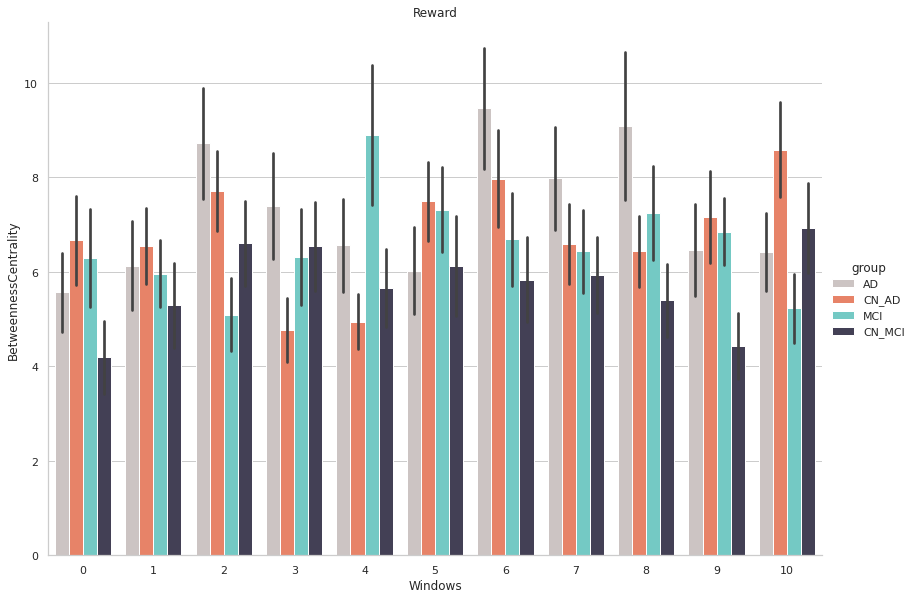

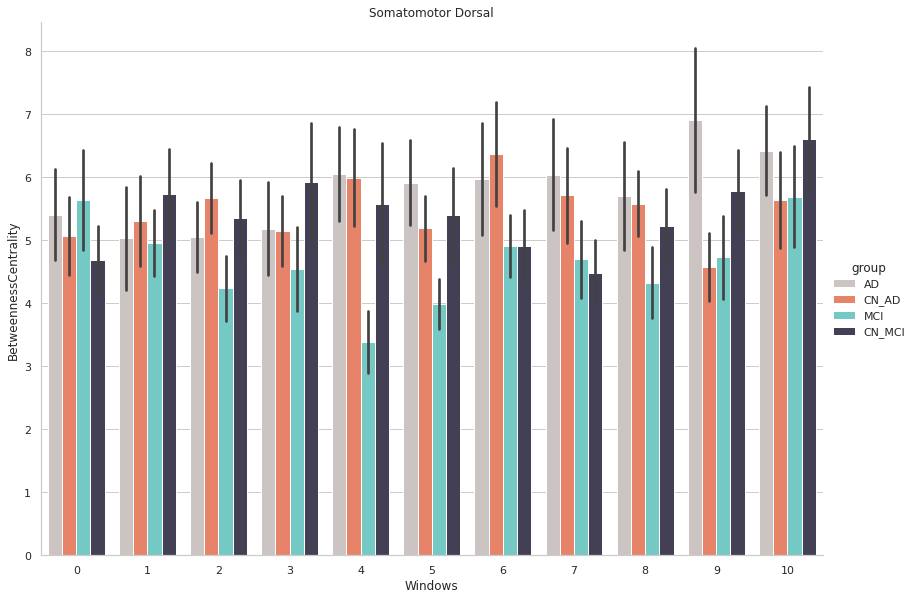

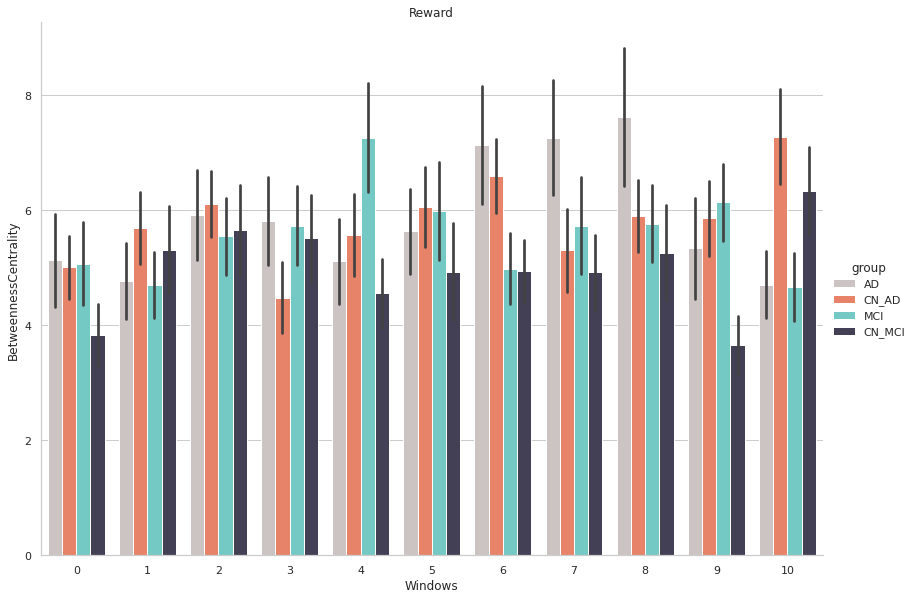

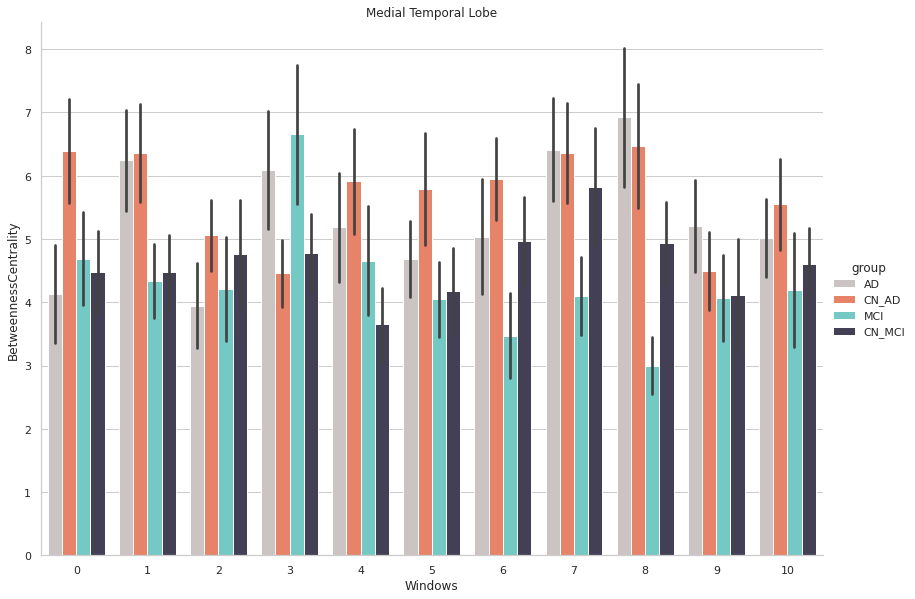

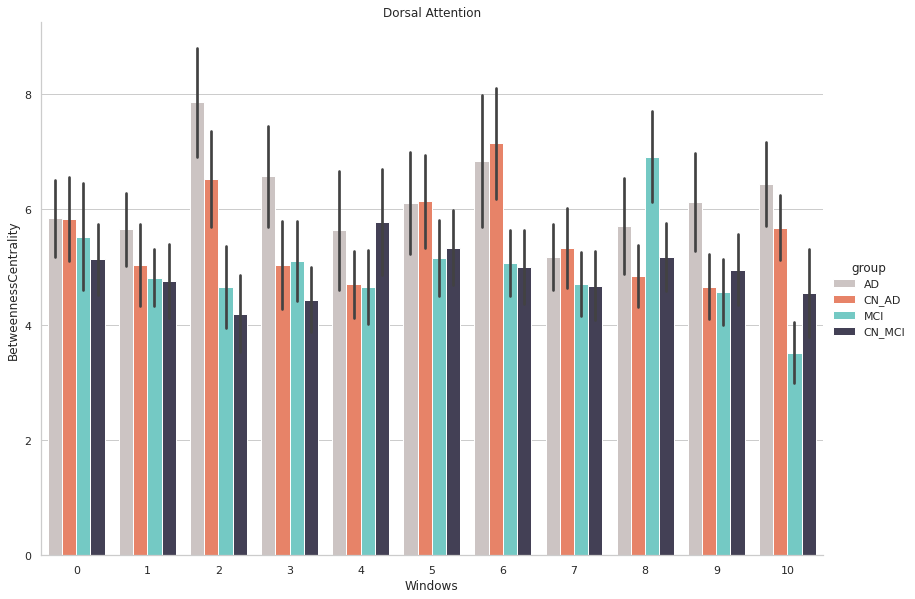

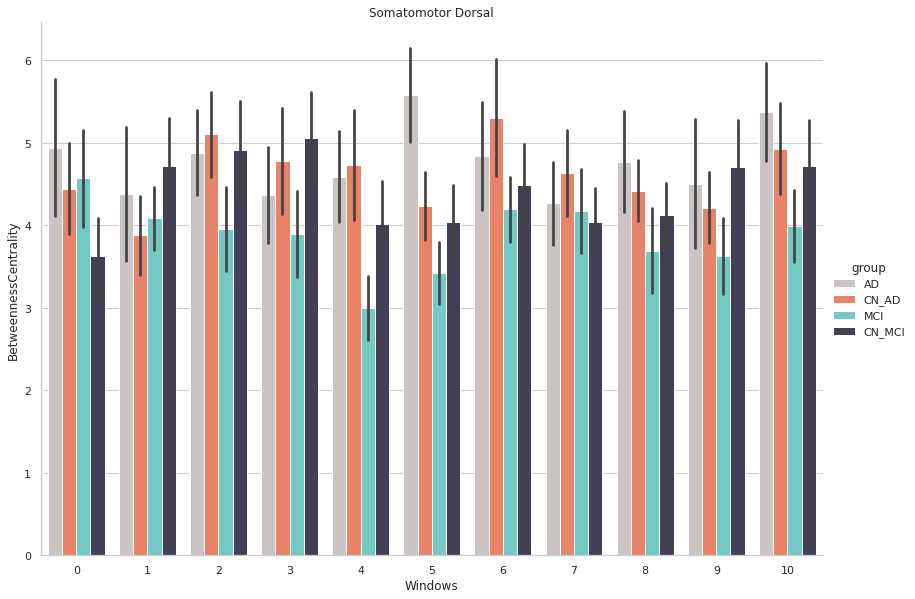

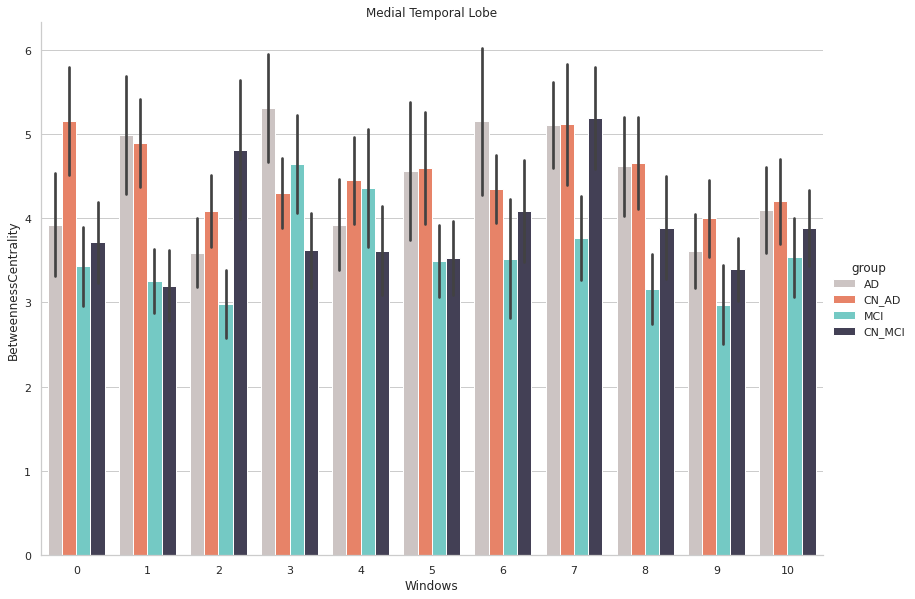

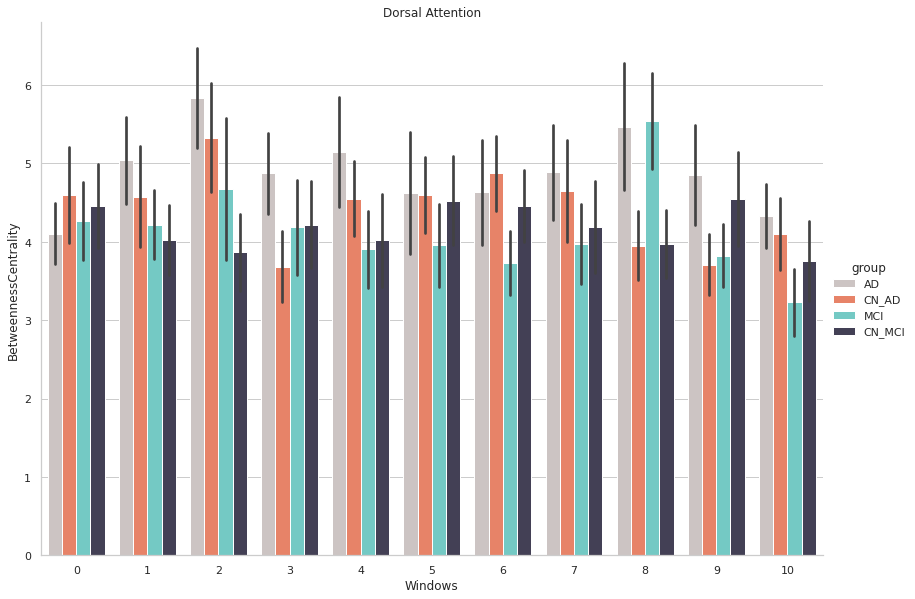

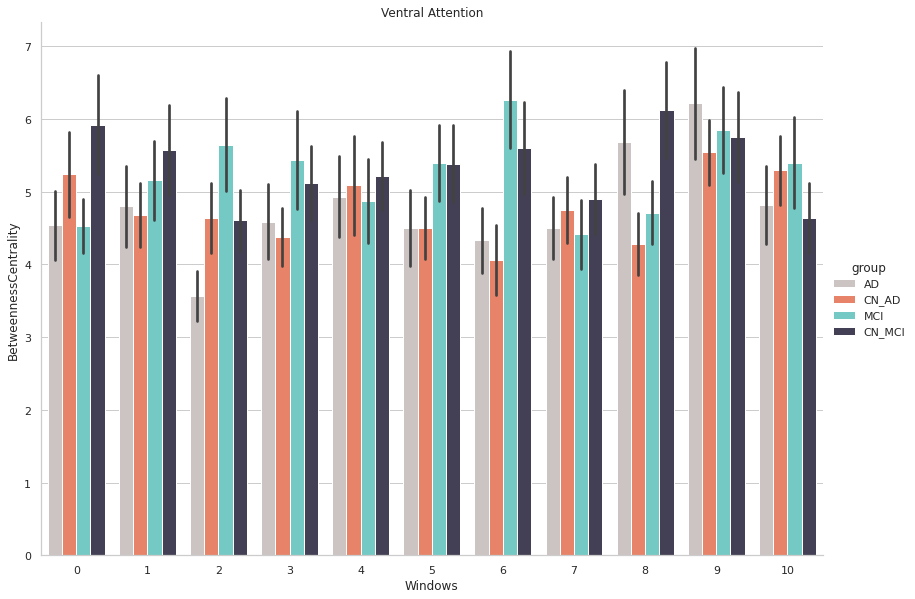

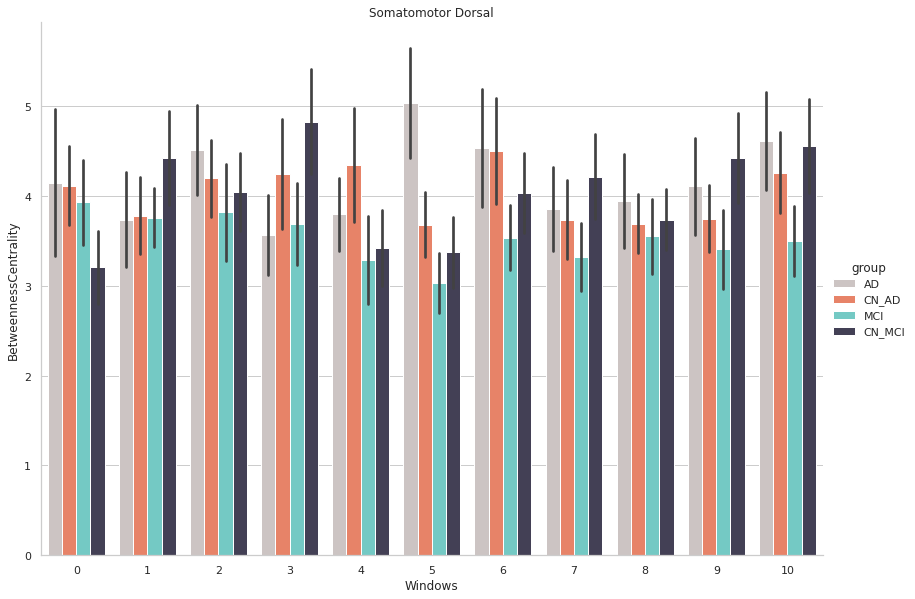

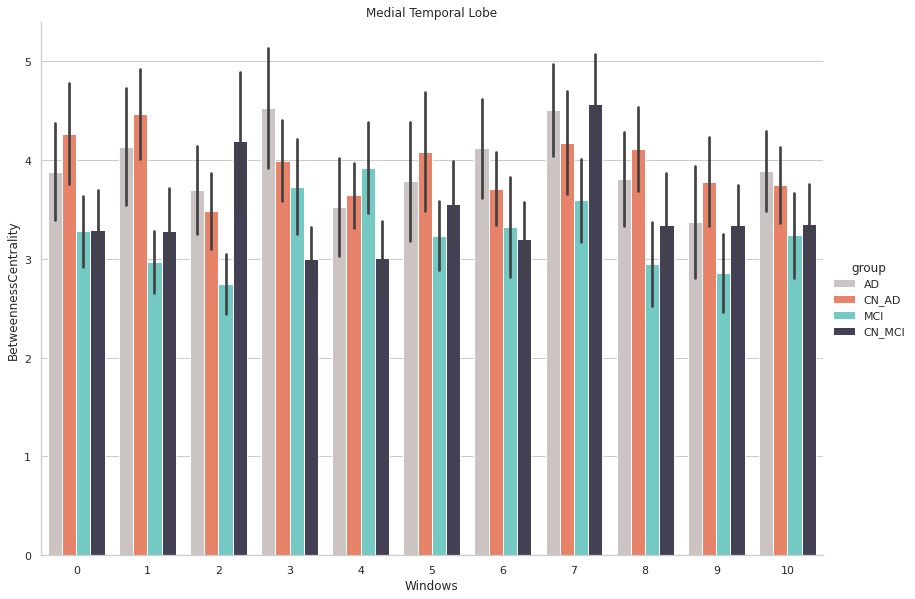

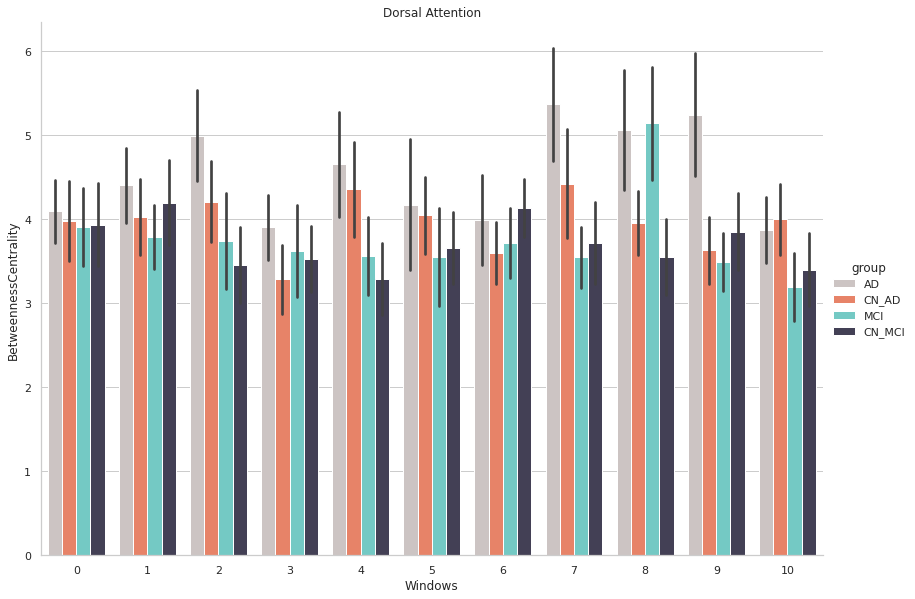

In [61]:
all_metrics, mx_anova, pw_test_1, pw_test_2, group_results = df_threshold(G1_BetweennessCentrality, G2_BetweennessCentrality, G3_BetweennessCentrality, G4_BetweennessCentrality, g_names=['AD', 'CN_AD', 'MCI', 'CN_MCI'], roi_names=GICA_300ROI, net_name='GICA_300ROI', name='BetweennessCentrality', subname='correlation', out=fout)

In [62]:
all_metrics.head()

,Parietal Memory,Default Mode,Auditory,Cingulo Opercular,Dorsal Attention,Fronto Parietal,Medial Temporal Lobe,Parieto Medial,Reward,Salience,Somatomotor Dorsal,Somatomotor Lateral,Unassigned,Ventral Attention,Visual,group,window,threshold,Subject
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,AD,0,Thres001,0
1,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,AD,0,Thres001,1
2,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,AD,0,Thres001,2
3,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AD,0,Thres001,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,AD,0,Thres001,4


In [23]:
g1_melt = pd.melt(g1_df, value_vars=g1_df.columns)
g1_melt

,variable,value
0,0,7.215152
1,0,3.478205
2,0,2.680109
3,0,2.616667
4,0,4.086447
...,...,...
955,14,0.410256
956,14,15.683333
957,14,5.045942
958,14,4.611111


In [ ]:
def stats(g1, g2, nets, out='', name=''):
    amount_threshold = len(g1)
    fname_all = f'{out}{name}/'
    if not os.path.exists(fname_all):
        os.makedirs(fname_all)
    else:
        shutil.rmtree(fname_all)  # Removes all the subdirectories
        os.makedirs(fname_all)
    for thr in range(1, amount_threshold+1):
        print('---THRESHOLD ', thr)
        # by each window
        g1_df = pd.read_fwf(g1[thr-1], sep='\t', header=None)
        g2_df = pd.read_fwf(g2[thr-1], sep='\t', header=None)
        stats = pd.DataFrame()
        for net in range(len(nets)):
            print('-NET ', net)
            test_ttest = pg.ttest(g1_df.iloc[:, net], g2_df.iloc[:, net], alternative='two-sided', paired=True, correction='auto', r=0.5)
            #print('p-value: ', float(test_ttest['p-val']))
            #print(test_ttest)
            g1_g2_df = pd.DataFrame([g1_df.iloc[:, net], g2_df.iloc[:, net]]).transpose()
            g1_g2_df.columns = [f'g1-{thr}-{net}', f'g2-{thr}-{net}']

            p_bonf_test = pg.ptests(g1_g2_df, paired=False, padjust='bonf', stars=False, decimals=6)
            test_ttest['p-bonf'] = float(p_bonf_test.iloc[0,1])
            stats = pd.concat([stats, test_ttest]).reset_index(drop=True)
        print('STATS')
        print(stats)
        #print(stats.to_csv(f'{fname_all}Thres{thr:03}.csv'))
        print('________________')

fout = '/home/kevrodz/Documents/Master/functional_connectivity/dynamic/STATISTICS/GRAPHS/AD_VS_CN_AD/'
stats(g1=G1_BetweennessCentrality, g2=G2_BetweennessCentrality, nets=GICA_300ROI, out=fout, name='BetweennessCentrality')


In [33]:
g1_df = pd.read_fwf(G1_BetweennessCentrality[0], sep='\t', header=None)
g1_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
61,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0
62,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0


In [34]:
g2_df = pd.read_fwf(G2_BetweennessCentrality[0], sep='\t', header=None)
g2_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,4.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
81,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
82,0.0,0.0,8.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
83,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [10]:
test_ttest = pg.ttest(g1_df.iloc[:, 0], g2_df.iloc[:, 0], alternative='two-sided', paired=True, correction=False)
test_ttest

/home/kevrodz/Documents/Master/neuro/lib/python3.10/site-packages/pingouin/parametric.py:228: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to paired == False. Check your data.")


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.438543,147,two-sided,0.661636,"[-0.45, 0.29]",0.072578,0.194,0.072015


In [11]:
test_ttest['p-val']

T-test    0.661636
Name: p-val, dtype: float64

In [14]:
g1_g2_df = pd.DataFrame([g1_df.iloc[:, 0], g2_df.iloc[:, 0]]).transpose()
#g1_g2_df.head()
p_bonf = pg.ptests(g1_g2_df, padjust='bonf', stars=False)
p_bonf

,0,0
0,-,1.
0,0.0,-


In [19]:
p_bonf_triu = float(p_bonf.iloc[0,1])
p_bonf_triu

1.0

In [64]:
g1_g2_df.to_csv('/home/kevrodz/Documents/Master/BetweennessCentrality_AD_CN_AD_W0.csv', index=False)

In [80]:
g1_g2_df.columns = ['AD', 'CN_AD']
g1_g2_df_2 = pd.melt(g1_g2_df, value_vars=g1_g2_df.columns)
g1_g2_df_2
#g1_g2_df.pivot(columns=g1_g2_df.columns, values=g1_g2_df.columns)

,variable,value
0,AD,1.0
1,AD,0.0
2,AD,4.0
3,AD,0.0
4,AD,0.0
...,...,...
165,CN_AD,4.0
166,CN_AD,0.0
167,CN_AD,0.0
168,CN_AD,0.0
